In [9]:
import numpy as np
import pandas as pd
from sklearn import tree

input_file = "./resume_shortlist.csv"
df = pd.read_csv(input_file, header = 0)

df.head()

,Degree,Grade,Work Experience,Referral,Shortlisted
0,BTech,50,4,N,N
1,MTech,40,4,N,N
2,MTech,95,5,N,Y
3,BTech,80,4,N,Y
4,MTech,60,5,N,Y


In [10]:
d = {'Y': 1, 'N': 0}
df['Shortlisted'] = df['Shortlisted'].map(d)
df['Referral'] = df['Referral'].map(d)

d = {'BTech': 0, 'MTech': 1}
df['Degree'] = df['Degree'].map(d)

df.head()

,Degree,Grade,Work Experience,Referral,Shortlisted
0,0,50,4,0,0
1,1,40,4,0,0
2,1,95,5,0,1
3,0,80,4,0,1
4,1,60,5,0,1


In [11]:
features = list(df.columns[:4])
features

['Degree', 'Grade', 'Work Experience', 'Referral']

In [12]:
y = df["Shortlisted"]
X = df[features]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,y)

In [13]:
print(clf.predict([[1, 90, 3, 1]]))


[1]


In [14]:
print(clf.predict([[0, 30, 5, 0]]))


[0]


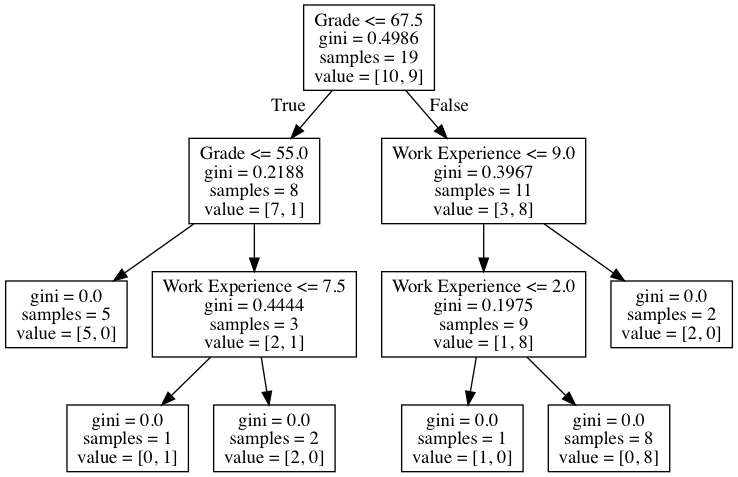

In [15]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
import pydotplus

dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=features)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())  

[0]
